In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
img = cv2.imread("coin.jpeg")

In [5]:
img = cv2.medianBlur(img,13)

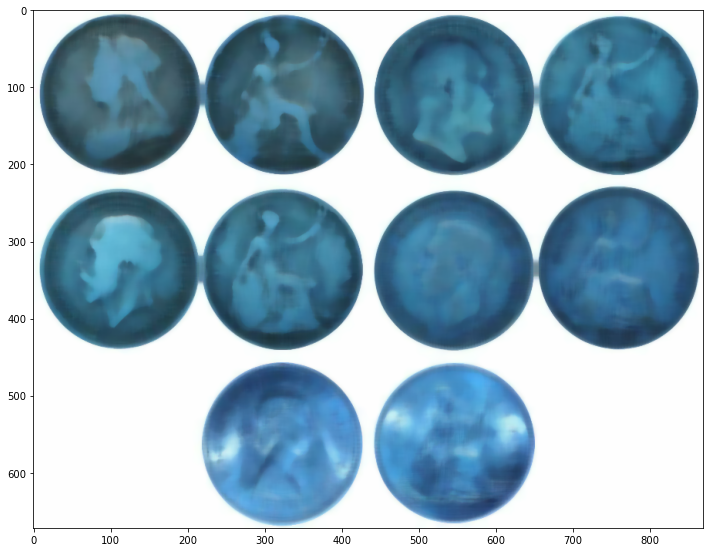

In [6]:
display(img)

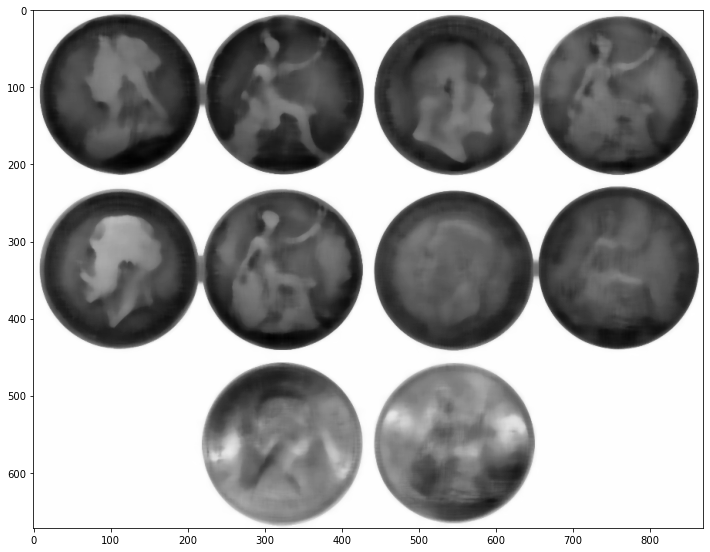

In [7]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray_img)

In [8]:
ret, thresh = cv2.threshold(gray_img,240,255,cv2.THRESH_BINARY_INV)

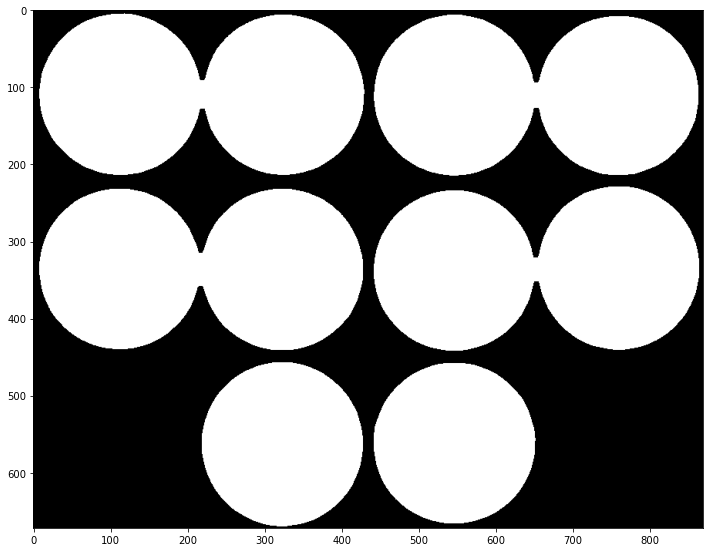

In [9]:
display(thresh)

In [10]:
#noise removal
kernel = np.ones((3,3),np.uint8)

In [11]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

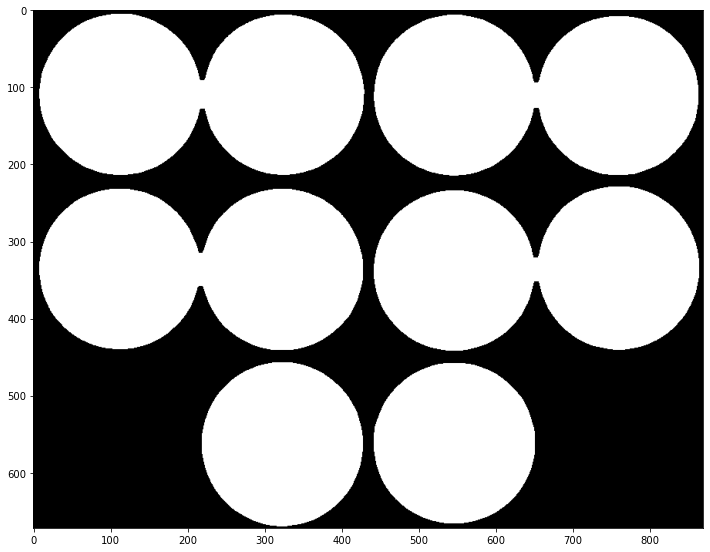

In [12]:
display(opening)

In [13]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

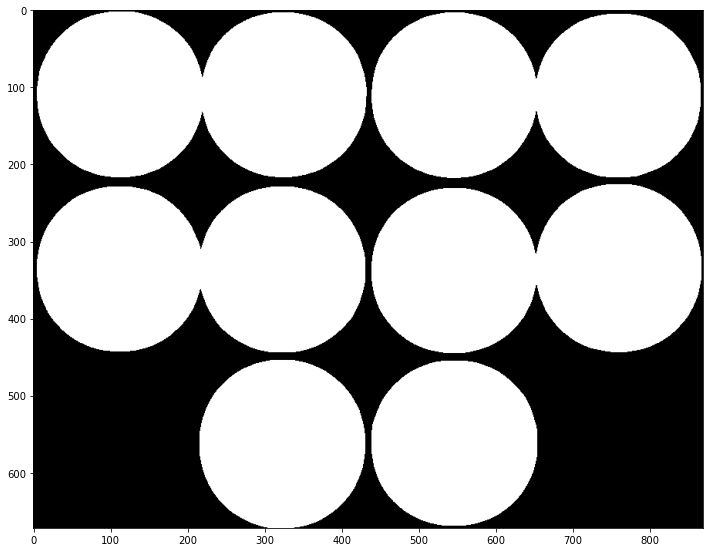

In [14]:
display(sure_bg)

In [15]:
#distance transform...the more center the more brightness
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

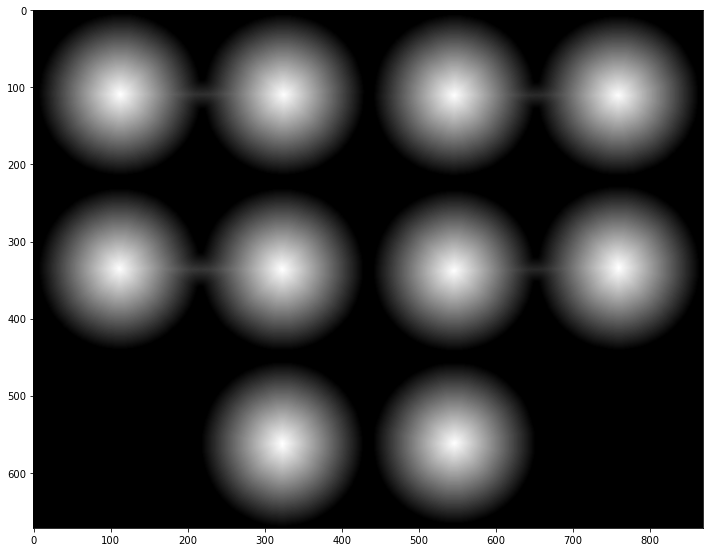

In [16]:
display(dist_transform)

In [17]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

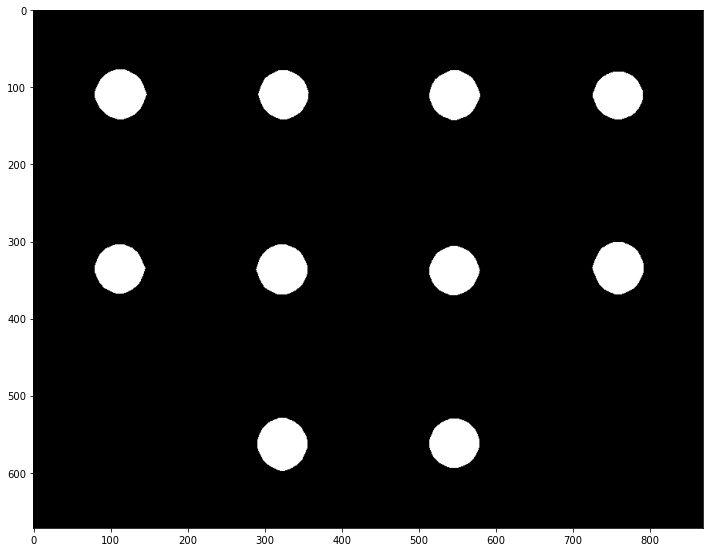

In [18]:
display(sure_fg)

In [19]:
sure_fg = np.uint8(sure_fg)

In [20]:
#displays the unknown region whether background or foreground
unknown = cv2.subtract(sure_bg,sure_fg)

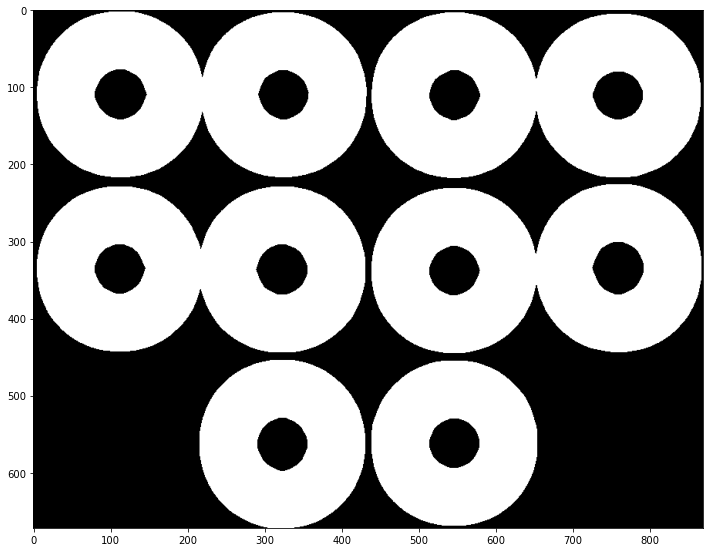

In [21]:
display(unknown)

In [22]:
ret, markers = cv2.connectedComponents(sure_bg)

In [23]:
markers = markers + 1

In [24]:
markers[unknown==255] == 0

array([False, False, False, ..., False, False, False])

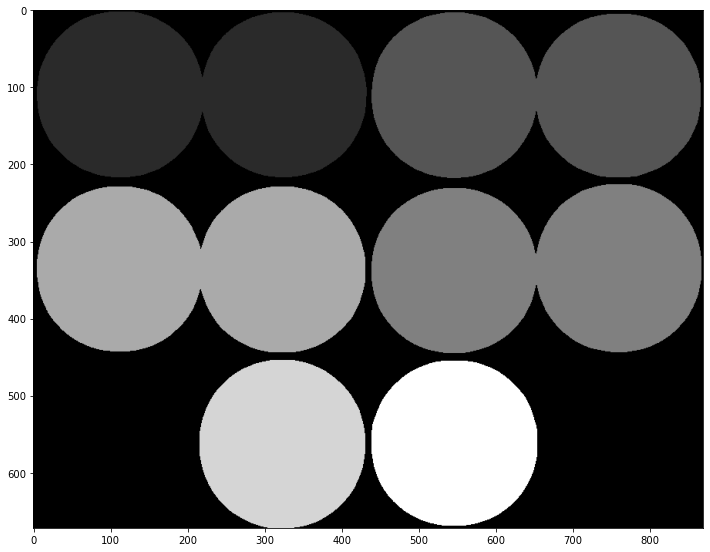

In [25]:
display(markers)

In [26]:
markers = cv2.watershed(img,markers)

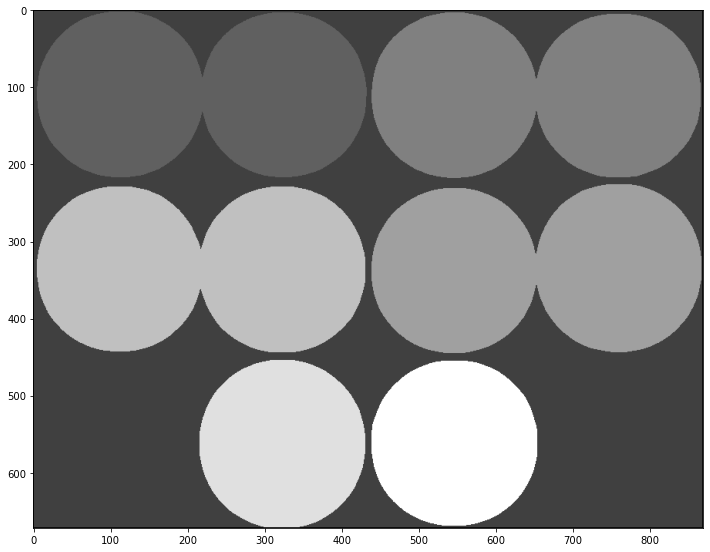

In [27]:
display(markers)

In [28]:
#perform contour detection to detect the edges/boundary
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][1][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

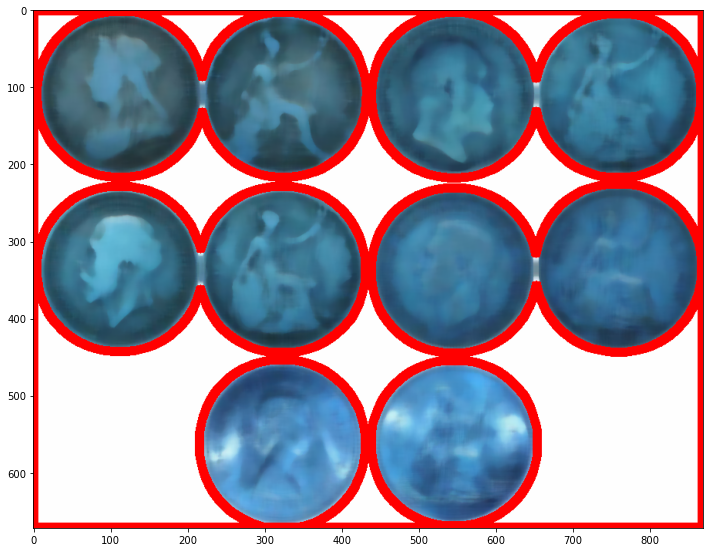

In [29]:
display(img)

In [30]:
img = cv2.imread("balls.jpg")

In [31]:
img = cv2.medianBlur(img,13)

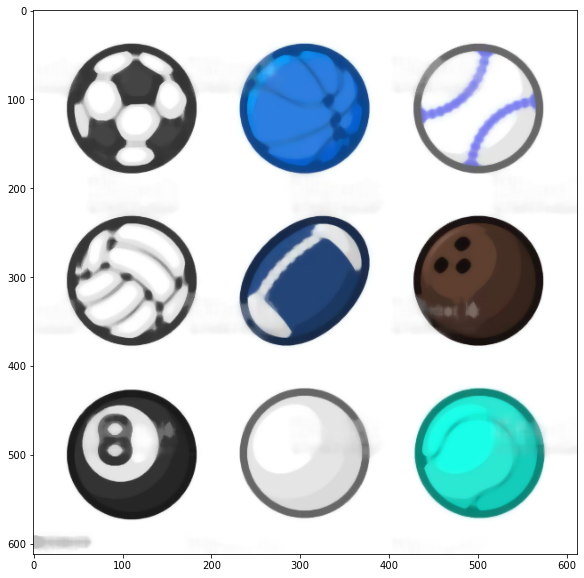

In [32]:
display(img)

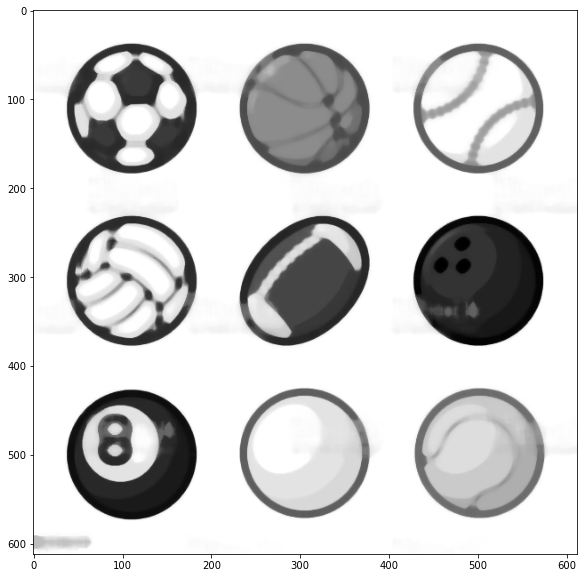

In [33]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray_img)

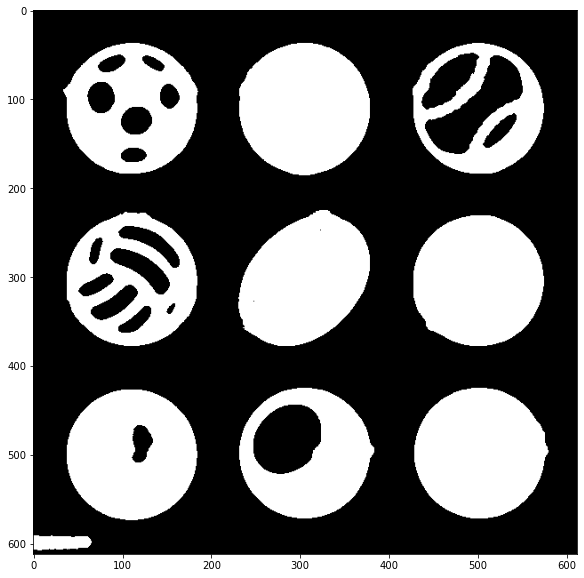

In [34]:
ret, thresh = cv2.threshold(gray_img,240,255,cv2.THRESH_BINARY_INV)
display(thresh)

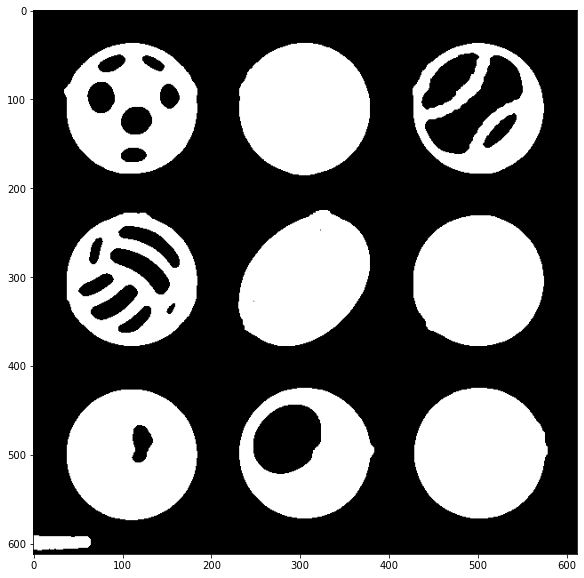

In [35]:
#noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

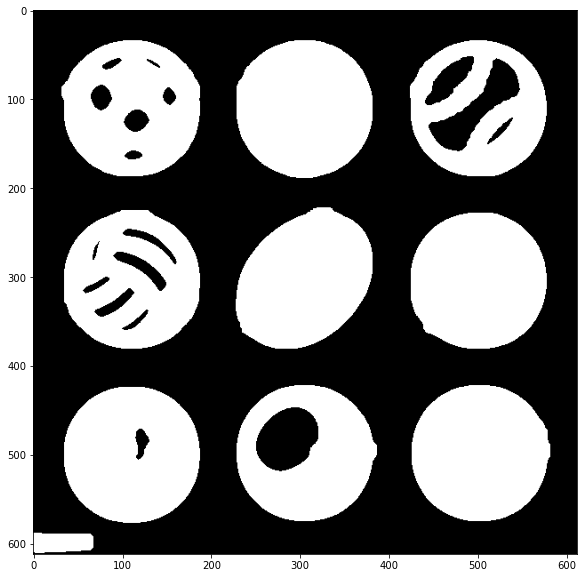

In [36]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

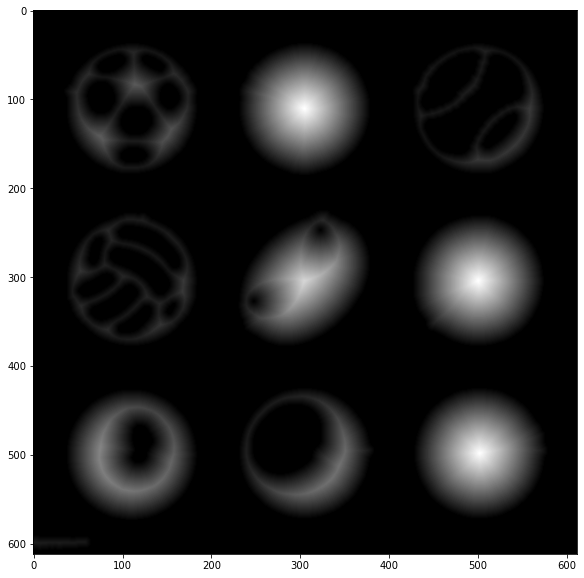

In [37]:
#distance transform...the more center the more brightness
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

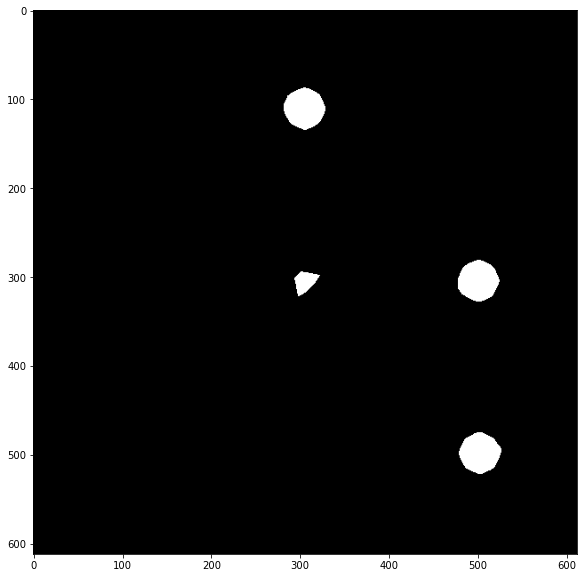

In [38]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg)

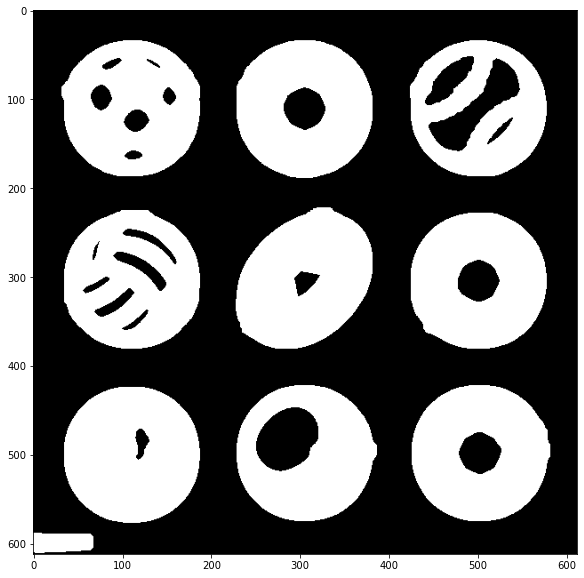

In [39]:
sure_fg = np.uint8(sure_fg)
#displays the unknown region whether background or foreground
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

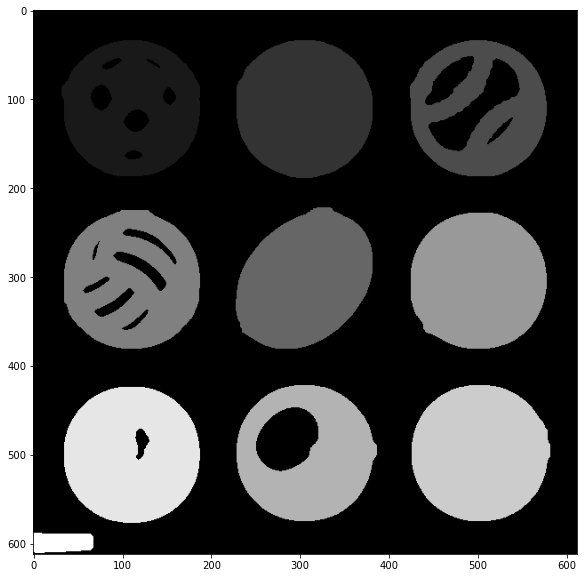

In [40]:
ret, markers = cv2.connectedComponents(sure_bg)
markers = markers + 1
markers[unknown==255] == 0
display(markers)

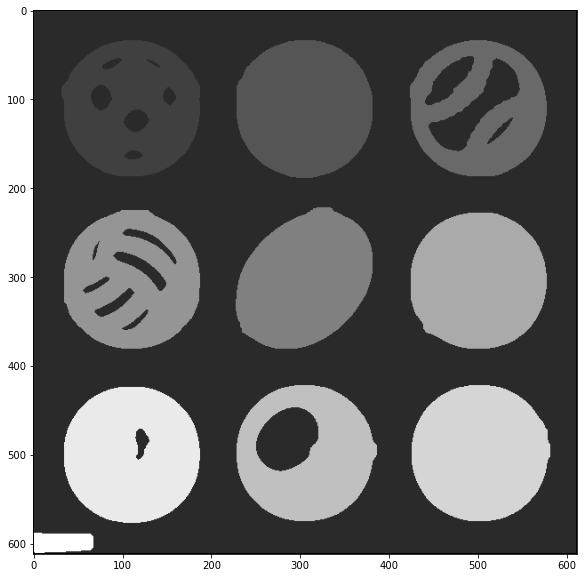

In [41]:
markers = cv2.watershed(img,markers)
display(markers)

In [42]:
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][1][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),10)

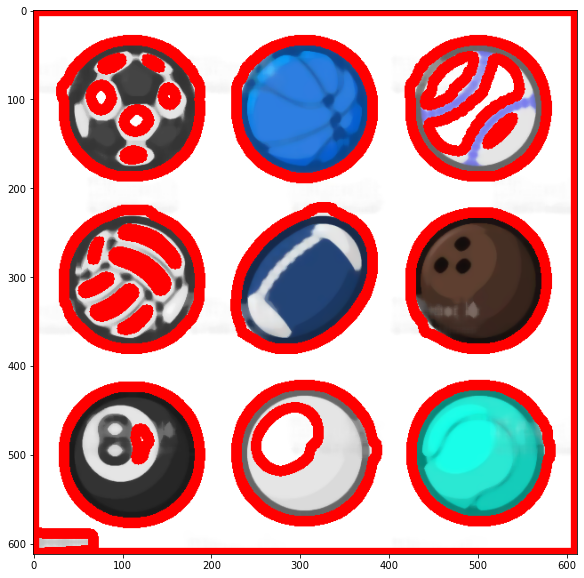

In [43]:
display(img)

In [50]:
img = cv2.imread("frands1.jpg")
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_copy = np.copy(img)

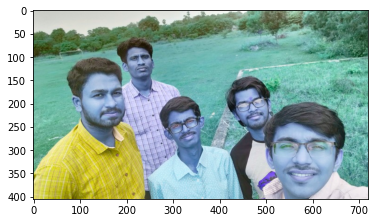

In [51]:
plt.imshow(img_copy)

In [53]:
img.shape[:2]

(405, 720)

In [55]:
marker_image = np.zeros(img.shape[:2],dtype=np.int32)
segments = np.zeros(img.shape,dtype=np.uint8)

In [57]:
print(marker_image.shape)
print(segments.shape)

(405, 720)
(405, 720, 3)


In [56]:
from matplotlib import cm

In [58]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [61]:
tuple(np.array(cm.tab10(0)[:3])*255)

(31.0, 119.0, 180.0)

In [62]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [63]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [64]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [69]:
n_markers = 10
current_marker = 1
marks_updated = False

In [70]:
def mouse_callback(event,x,y,flags,param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        #marker passed to watershed algo
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
        
        #user sees on og image
        cv2.circle(img_copy,(x,y),10,colors[current_marker],-1)
        
        marks_updated = True

In [71]:
cv2.namedWindow("Image")
cv2.setMouseCallback("Image",mouse_callback)

while True:
    cv2.imshow("Watershed Segments",segments)
    cv2.imshow("Image",img_copy)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
    
    #press c to clear all colors
    elif k == ord('c'):
        img_copy = img.copy()
        marker_image = np.zeros(img.shape[:2],dtype=np.int32)
        segments = np.zeros(img.shape,dtype=np.uint8)
    
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(img,marker_image_copy)
        segments = np.zeros(img.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
                           
cv2.destroyAllWindows()

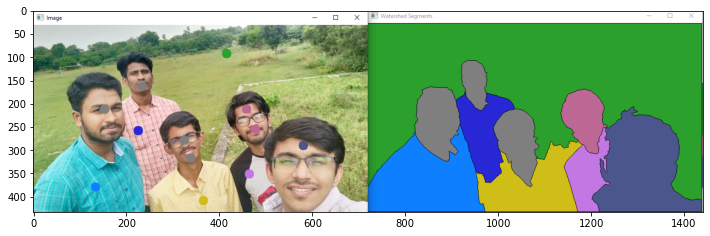

In [73]:
res = cv2.imread("watershed.png")
res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
display(res)